# This Notebook uses Rotary indicTrans2 1B model for Machine Translation from Indian to English Languages

In [10]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
pip install IndicTransToolkit

In [ ]:
pip install evaluate sacrebleu

In [ ]:
!nvidia-smi

In [3]:
import torch
import warnings
import json
from IndicTransToolkit.processor import IndicProcessor
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import evaluate

In [7]:
# languages not in flores_plus -> doi_Deva
# has an issue with inference for kas_Deva, mni_Beng, san_Deva
# In_langs = ['asm_Beng','ben_Beng','brx_Deva','eng_Latn','gom_Deva','guj_Gujr','hin_Deva','kan_Knda','kas_Arab','kas_Deva','mai_Deva','mal_Mlym','mar_Deva','mni_Beng','mni_Mtei','npi_Deva','ory_Orya','pan_Guru','san_Deva','sat_Olck','snd_Arab','snd_Deva','tam_Taml','tel_Telu','urd_Arab']
In_langs = ['asm_Beng','ben_Beng','brx_Deva','eng_Latn','gom_Deva','guj_Gujr','hin_Deva','kan_Knda','kas_Arab','mai_Deva','mal_Mlym','mar_Deva','mni_Mtei','npi_Deva','ory_Orya','pan_Guru','sat_Olck','snd_Arab','snd_Deva','tam_Taml','tel_Telu','urd_Arab']

In [8]:
ds={}

In [11]:
for lan in In_langs:
    ds[lan] = load_dataset("openlanguagedata/flores_plus",lan,split='dev',trust_remote_code=True)

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/asm_Beng.parquet:   0%|          | 0.00/168k [00:00<?, ?B/s]

devtest/asm_Beng.parquet:   0%|          | 0.00/174k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/ben_Beng.parquet:   0%|          | 0.00/166k [00:00<?, ?B/s]

devtest/ben_Beng.parquet:   0%|          | 0.00/172k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/brx_Deva.parquet:   0%|          | 0.00/164k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/eng_Latn.parquet:   0%|          | 0.00/112k [00:00<?, ?B/s]

devtest/eng_Latn.parquet:   0%|          | 0.00/117k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/gom_Deva.parquet:   0%|          | 0.00/160k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/guj_Gujr.parquet:   0%|          | 0.00/162k [00:00<?, ?B/s]

devtest/guj_Gujr.parquet:   0%|          | 0.00/170k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/hin_Deva.parquet:   0%|          | 0.00/161k [00:00<?, ?B/s]

devtest/hin_Deva.parquet:   0%|          | 0.00/168k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/kan_Knda.parquet:   0%|          | 0.00/175k [00:00<?, ?B/s]

devtest/kan_Knda.parquet:   0%|          | 0.00/180k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/kas_Arab.parquet:   0%|          | 0.00/150k [00:00<?, ?B/s]

devtest/kas_Arab.parquet:   0%|          | 0.00/156k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/mai_Deva.parquet:   0%|          | 0.00/158k [00:00<?, ?B/s]

devtest/mai_Deva.parquet:   0%|          | 0.00/165k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/mal_Mlym.parquet:   0%|          | 0.00/184k [00:00<?, ?B/s]

devtest/mal_Mlym.parquet:   0%|          | 0.00/192k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/mar_Deva.parquet:   0%|          | 0.00/168k [00:00<?, ?B/s]

devtest/mar_Deva.parquet:   0%|          | 0.00/176k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/mni_Mtei.parquet:   0%|          | 0.00/153k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/npi_Deva.parquet:   0%|          | 0.00/161k [00:00<?, ?B/s]

devtest/npi_Deva.parquet:   0%|          | 0.00/169k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/ory_Orya.parquet:   0%|          | 0.00/169k [00:00<?, ?B/s]

devtest/ory_Orya.parquet:   0%|          | 0.00/177k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/pan_Guru.parquet:   0%|          | 0.00/165k [00:00<?, ?B/s]

devtest/pan_Guru.parquet:   0%|          | 0.00/172k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/sat_Olck.parquet:   0%|          | 0.00/164k [00:00<?, ?B/s]

devtest/sat_Olck.parquet:   0%|          | 0.00/170k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/snd_Arab.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

devtest/snd_Arab.parquet:   0%|          | 0.00/141k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/snd_Deva.parquet:   0%|          | 0.00/168k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/tam_Taml.parquet:   0%|          | 0.00/178k [00:00<?, ?B/s]

devtest/tam_Taml.parquet:   0%|          | 0.00/187k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/tel_Telu.parquet:   0%|          | 0.00/171k [00:00<?, ?B/s]

devtest/tel_Telu.parquet:   0%|          | 0.00/176k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

dev/urd_Arab.parquet:   0%|          | 0.00/146k [00:00<?, ?B/s]

devtest/urd_Arab.parquet:   0%|          | 0.00/151k [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating devtest split:   0%|          | 0/1012 [00:00<?, ? examples/s]

In [6]:
# ds['eng_Latn'] = load_dataset("openlanguagedata/flores_plus",'eng_Latn',split='dev',trust_remote_code=True)

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

In [7]:
warnings.filterwarnings("ignore")
model_name = "prajdabre/rotary-indictrans2-indic-en-1B"
device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
ip = IndicProcessor(inference=True)
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

In [9]:
model = AutoModelForSeq2SeqLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to(device)

In [10]:
translations = {}

In [11]:
batch_size = 10

In [12]:
def translate(sentences,src_lang, tgt_lang):
    translations[f"{src_lang}-{tgt_lang}"] = []
    with torch.inference_mode():
        for i in range(0, len(sentences),batch_size):
            batch = ip.preprocess_batch(sentences[i:i+batch_size], src_lang, tgt_lang)
            batch = tokenizer(batch, padding="longest", truncation=True, max_length=2048, return_tensors="pt").to(device)
            outputs = model.generate(
                **batch,
                num_beams=5,
                length_penalty=1.5,
                repetition_penalty=2.0,
                num_return_sequences=1,
                max_new_tokens=2048,
                early_stopping=True
            )

            outputs = tokenizer.batch_decode(
                outputs, skip_special_tokens=True, clean_up_tokenization_spaces=True
            )
            outputs = ip.postprocess_batch(outputs, lang = tgt_lang)
            print(f"Translations from {src_lang} to {tgt_lang}: Btach - {i/batch_size}")
            translations[f"{src_lang}-{tgt_lang}"] += outputs
            del batch, outputs
            torch.cuda.empty_cache()

## Inferencing and Saving the output to a json file

In [ ]:
tgt_lang = 'eng_Latn'
for lang in In_langs:
    translate(sentences = ds[lang]['text'],src_lang = lang, tgt_lang = tgt_lang)
    try:
        with open("translations_in-en.json", "w", encoding="utf-8") as f:
            json.dump(translations, f, indent=4, ensure_ascii=False)
        print(f"File saved as of {lang}")
    except IOError as e:
        print(f"Error saving file: {e}")
            

In [ ]:
translations.keys()

## Loading the saved translations

In [4]:
with open('/kaggle/input/translation-in-en-flores/translations_in-en.json','r',encoding='utf-8') as f:
    translations = json.load(f)

In [15]:
translations['tam_Taml-eng_Latn'][0]
print(translations['tam_Taml-eng_Latn'][0])
ds['tam_Taml']['text'][0]

On Monday, scientists at Stanford University School of Medicine announced the invention of a new diagnostic tool that can sort cells by type: 1 யு.எஸ் each using a small printable chip, standard inkjet printers.


'திங்களன்று, ஸ்டான்போர்ட் யுனிவர்சிட்டி ஸ்கூல் ஆஃப் மெடிசின் விஞ்ஞானிகள் ஒரு புதிய நோயறிதல் கருவியின் கண்டுபிடிப்பை அறிவித்தனர், இது செல்களை வகைப்படி வரிசைப்படுத்தலாம்: ஒரு சிறிய அச்சிடக்கூடிய சில்லு, தரமான இன்க்ஜெட் அச்சுப்பொறிகளைப் பயன்படுத்தி ஒவ்வொன்றும் 1 யு.எஸ்.'

## Evaluating the Translations

In [16]:
avl_langs = ['asm_Beng','ben_Beng','brx_Deva','eng_Latn','gom_Deva','guj_Gujr','hin_Deva','kan_Knda','kas_Arab','mai_Deva','mal_Mlym','mar_Deva','mni_Mtei','npi_Deva','ory_Orya','pan_Guru','sat_Olck','snd_Arab','snd_Deva','tam_Taml','tel_Telu','urd_Arab']

In [17]:
evaluation_scores = {}

In [23]:
chrf = evaluate.load("chrf")

In [36]:
def reshape_to_2D(refs):
    return np.array(refs).reshape(-1,1)

In [25]:
for lang in avl_langs:
    preds = translations[f"{lang}-eng_Latn"]
    refs = ds['eng_Latn']['text']
    eval_score = chrf.compute(predictions = preds, references = reshape_to_2D(refs), word_order = 2)
    evaluation_scores[lang] = []
    evaluation_scores[lang] = eval_score['score']

In [26]:
evaluation_scores

{'asm_Beng': 55.02377328023853,
 'ben_Beng': 60.569653353695905,
 'brx_Deva': 56.71401994156212,
 'eng_Latn': 97.54725670436216,
 'gom_Deva': 56.83550425011013,
 'guj_Gujr': 65.20364208998254,
 'hin_Deva': 67.43870722307057,
 'kan_Knda': 61.8241065752429,
 'kas_Arab': 62.30953337492038,
 'mai_Deva': 69.6320359035539,
 'mal_Mlym': 63.8548309300407,
 'mar_Deva': 63.323504082889016,
 'mni_Mtei': 57.31328582774382,
 'npi_Deva': 67.83315815724418,
 'ory_Orya': 64.85052835455029,
 'pan_Guru': 63.64088785701313,
 'sat_Olck': 47.307966682074095,
 'snd_Arab': 64.60988389526318,
 'snd_Deva': 53.33692393085878,
 'tam_Taml': 61.64449394851166,
 'tel_Telu': 66.86934846877728,
 'urd_Arab': 63.00906460411593}

## Visualizing the outputs

In [37]:
score = [val for val in evaluation_scores.values()]
score = reshape_to_2D(score)
score

array([[55.02377328],
       [60.56965335],
       [56.71401994],
       [97.5472567 ],
       [56.83550425],
       [65.20364209],
       [67.43870722],
       [61.82410658],
       [62.30953337],
       [69.6320359 ],
       [63.85483093],
       [63.32350408],
       [57.31328583],
       [67.83315816],
       [64.85052835],
       [63.64088786],
       [47.30796668],
       [64.6098839 ],
       [53.33692393],
       [61.64449395],
       [66.86934847],
       [63.0090646 ]])

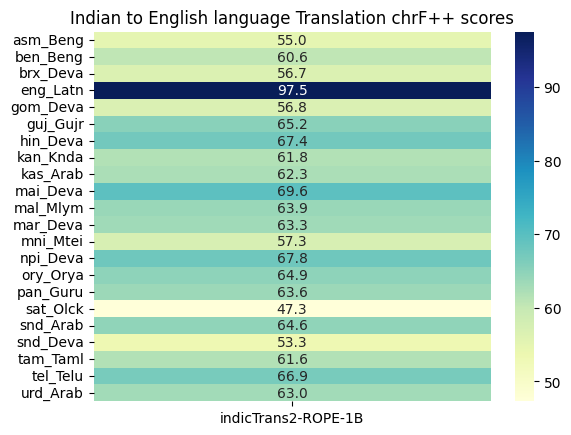

In [46]:
sns.heatmap(score,annot=True, fmt=".1f",xticklabels = ["indicTrans2-ROPE-1B"],yticklabels = evaluation_scores.keys(),cmap = 'YlGnBu')
plt.title("Indian to English language Translation chrF++ scores")
plt.show()